In [1]:
import pandas as pd
from sklearn.linear_model import BayesianRidge
from pickle import *

In [2]:
data=pd.read_csv("yield_df.csv")
print(data)

       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               1485             121.00     16.37  
1                               1485             121.00     16.37  
2  

In [3]:
features=data[[ "Year","average_rain_fall_mm_per_year","pesticides_tonnes","avg_temp"]]
target=data["hg/ha_yield"]

In [5]:
model=BayesianRidge()
model.fit(features.values,target)

BayesianRidge()

In [6]:
f=open("re.pkl","wb")
dump(model,f)
f.close()
print("model created")

model created


In [7]:
from pickle import *
import os

In [16]:
import os
from joblib import load

fn = "re.pkl"

if os.path.exists(fn):
    with open(fn, "rb") as f:
        model = load(f)
    print("Model loaded")
else:
    print(fn, "does not exist")
    # Handle the case where the model file does not exist

year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Make prediction
yield_prediction = model.predict([[year, avg_rainfall, Pest, avg_temp]])
print("Predicted yield:", yield_prediction)


Model loaded
Enter year: 1650
Enter average rainfall per mm: 1200
Enter Pesticides_tonnes: 110
Enter average temperature: 12
Predicted yield: [73721.08336507]


In [10]:
import numpy as np

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # prior precision
        self.beta = beta    # noise precision
        self.w_mean = None  # posterior mean
        self.w_cov = None   # posterior covariance

    def fit(self, X, y):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute posterior covariance matrix
        self.w_cov = np.linalg.inv(self.alpha * np.eye(X.shape[1]) + self.beta * X.T @ X)
        
        # Compute posterior mean
        self.w_mean = self.beta * self.w_cov @ X.T @ y

    def predict(self, X):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Predict using posterior mean
        return X @ self.w_mean

# Example usage:
# Assuming you have your training data X_train and y_train
X_train = np.array([[2019, 100, 50, 25], [2020, 110, 55, 26], [2021, 105, 52, 24]])
y_train = np.array([10, 12, 11])

# Create and fit the Bayesian linear regression model
bayesian_lr = BayesianLinearRegression()
bayesian_lr.fit(X_train, y_train)

# Predict using the model
year = 2022
avg_rainfall = 115
Pest = 60
avg_temp = 27
yield_prediction = bayesian_lr.predict(np.array([[year, avg_rainfall, Pest, avg_temp]]))
print("Predicted yield:", yield_prediction)


Predicted yield: [13.14388282]


In [19]:
import os
from joblib import load
import numpy as np

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # prior precision
        self.beta = beta    # noise precision
        self.w_mean = None  # posterior mean
        self.w_cov = None   # posterior covariance

    def fit(self, X, y):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute posterior covariance matrix
        self.w_cov = np.linalg.inv(self.alpha * np.eye(X.shape[1]) + self.beta * X.T @ X)
        
        # Compute posterior mean
        self.w_mean = self.beta * self.w_cov @ X.T @ y

    def predict(self, X):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Predict using posterior mean
        return X @ self.w_mean

# Load the model from file
fn = "re.pkl"

if os.path.exists(fn):
    with open(fn, "rb") as f:
        model = load(f)
    print("Model loaded")
else:
    print(fn, "does not exist")
    # Handle the case where the model file does not exist

# Take input from user
year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Make prediction
yield_prediction = model.predict(np.array([[year, avg_rainfall, Pest, avg_temp]]))
print("Predicted yield:", yield_prediction)


Model loaded
Enter year: 2024
Enter average rainfall per mm: 1500
Enter Pesticides_tonnes: 110
Enter average temperature: 22
Predicted yield: [73715.41613021]


In [20]:
import numpy as np
import tensorflow as tf
import os
from joblib import load

# Define a function to create and compile the TensorFlow model
def create_tf_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Load the model from file
fn = "re.pkl"

if os.path.exists(fn):
    with open(fn, "rb") as f:
        model_bayesian = load(f)
    print("Bayesian Linear Regression model loaded")
else:
    print(fn, "does not exist")
    # Handle the case where the model file does not exist

# Take input from user
year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Prepare input features for TensorFlow model
X_tf = np.array([[year, avg_rainfall, Pest, avg_temp]])

# Create and fit the TensorFlow model
tf_model = create_tf_model(input_shape=X_tf.shape[1])
tf_model.fit(X_tf, model_bayesian.predict(X_tf), epochs=100, verbose=0)

# Make prediction using the TensorFlow model
yield_prediction_tf = tf_model.predict(X_tf)
print("Predicted yield using TensorFlow model:", yield_prediction_tf)


Bayesian Linear Regression model loaded
Enter year: 2024
Enter average rainfall per mm: 1500
Enter Pesticides_tonnes: 110
Enter average temperature: 22
1/1 [==============================] - 0s 115ms/step
Predicted yield using TensorFlow model: [[1334.7076]]


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate predictions using the Bayesian model
yield_prediction_bayesian = model_bayesian.predict(X_tf)

# Calculate Mean Absolute Error and Mean Squared Error for Bayesian model
mae_bayesian = mean_absolute_error(yield_prediction_bayesian, yield_prediction_tf)
mse_bayesian = mean_squared_error(yield_prediction_bayesian, yield_prediction_tf)

# Print comparison results
print("Comparison of Predicted Yield:")
print("Bayesian Linear Regression Model Prediction:", yield_prediction_bayesian)
print("TensorFlow Model Prediction:", yield_prediction_tf)
print("")

print("Accuracy Metrics:")
print("Mean Absolute Error (MAE) for Bayesian Model:", mae_bayesian)
print("Mean Squared Error (MSE) for Bayesian Model:", mse_bayesian)


Comparison of Predicted Yield:
Bayesian Linear Regression Model Prediction: [73715.41613021]
TensorFlow Model Prediction: [[1334.7076]]

Accuracy Metrics:
Mean Absolute Error (MAE) for Bayesian Model: 72380.70848860832
Mean Squared Error (MSE) for Bayesian Model: 5238966961.312896


1/1 [==============================] - 0s 51ms/step


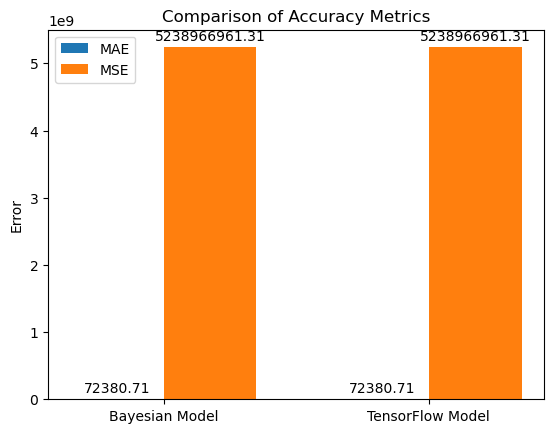

In [22]:
import matplotlib.pyplot as plt

# Calculate predictions using the TensorFlow model
yield_prediction_tf = tf_model.predict(X_tf)

# Calculate Mean Absolute Error and Mean Squared Error for TensorFlow model
mae_tf = mean_absolute_error(yield_prediction_tf, yield_prediction_bayesian)
mse_tf = mean_squared_error(yield_prediction_tf, yield_prediction_bayesian)

# Accuracy metrics
accuracy_metrics = {
    'Bayesian Model': {'MAE': mae_bayesian, 'MSE': mse_bayesian},
    'TensorFlow Model': {'MAE': mae_tf, 'MSE': mse_tf}
}

# Plotting
labels = accuracy_metrics.keys()
mae_values = [metric['MAE'] for metric in accuracy_metrics.values()]
mse_values = [metric['MSE'] for metric in accuracy_metrics.values()]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, mae_values, width, label='MAE')
rects2 = ax.bar([i + width for i in x], mse_values, width, label='MSE')

ax.set_ylabel('Error')
ax.set_title('Comparison of Accuracy Metrics')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


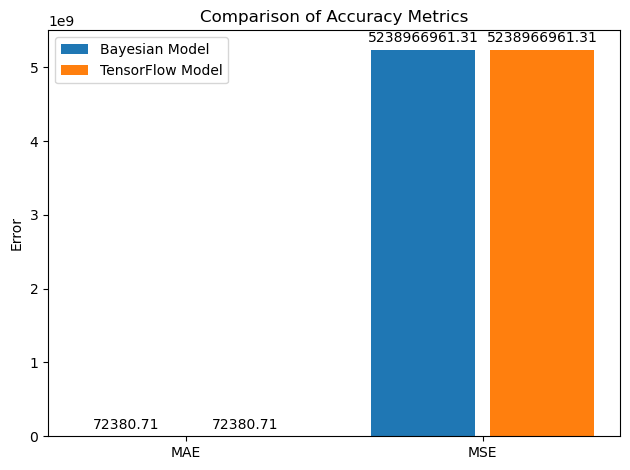

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy metrics
bayesian_metrics = {'MAE': mae_bayesian, 'MSE': mse_bayesian}
tf_metrics = {'MAE': mae_tf, 'MSE': mse_tf}

# Plotting
labels = bayesian_metrics.keys()
bayesian_values = list(bayesian_metrics.values())
tf_values = list(tf_metrics.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
gap = 0.05  # the gap between the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - gap/2, bayesian_values, width, label='Bayesian Model')
rects2 = ax.bar(x + width/2 + gap/2, tf_values, width, label='TensorFlow Model')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('Comparison of Accuracy Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


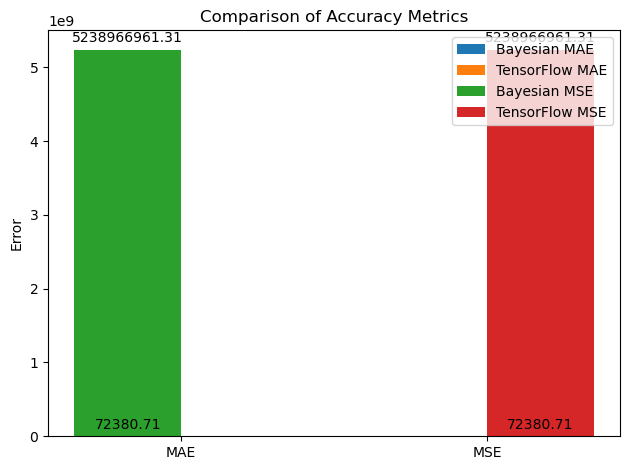

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy metrics
bayesian_metrics = {'MAE': mae_bayesian, 'MSE': mse_bayesian}
tf_metrics = {'MAE': mae_tf, 'MSE': mse_tf}

# Plotting
labels = bayesian_metrics.keys()
bayesian_mae_values = [bayesian_metrics['MAE'], np.nan]  # Add NaN to create space between bars
tf_mae_values = [np.nan, tf_metrics['MAE']]  # Add NaN to create space between bars
bayesian_mse_values = [bayesian_metrics['MSE'], np.nan]  # Add NaN to create space between bars
tf_mse_values = [np.nan, tf_metrics['MSE']]  # Add NaN to create space between bars

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bayesian_mae_values, width, label='Bayesian MAE')
rects2 = ax.bar(x + width/2, tf_mae_values, width, label='TensorFlow MAE')
rects3 = ax.bar(x - width/2, bayesian_mse_values, width, label='Bayesian MSE')
rects4 = ax.bar(x + width/2, tf_mse_values, width, label='TensorFlow MSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_title('Comparison of Accuracy Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


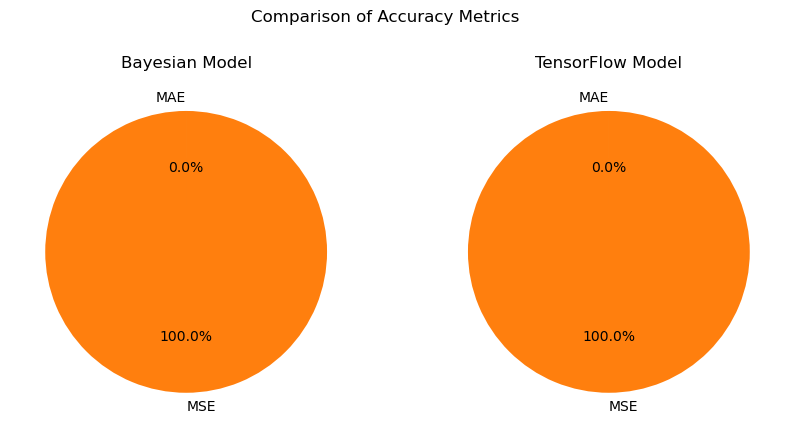

In [30]:
import matplotlib.pyplot as plt

# Accuracy metrics
bayesian_metrics = {'MAE': mae_bayesian, 'MSE': mse_bayesian}
tf_metrics = {'MAE': mae_tf, 'MSE': mse_tf}

# Combine the metrics for both models into a single dictionary
combined_metrics = {'Bayesian Model': bayesian_metrics, 'TensorFlow Model': tf_metrics}

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a grid of subplots with 1 row and 2 columns

# Iterate through each model's metrics
for i, (model, metrics) in enumerate(combined_metrics.items()):
    ax = axs[i]  # Select the appropriate subplot
    
    # Plot the metrics as a pie chart
    ax.pie(metrics.values(), labels=metrics.keys(), autopct='%1.1f%%', startangle=90)
    ax.set_title(model)  # Set the title for the subplot

# Set the title for the entire figure
fig.suptitle('Comparison of Accuracy Metrics')

plt.show()


In [9]:
import numpy as np

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # prior precision
        self.beta = beta    # noise precision
        self.w_mean = None  # posterior mean
        self.w_cov = None   # posterior covariance

    def fit(self, X, y):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute posterior covariance matrix
        self.w_cov = np.linalg.inv(self.alpha * np.eye(X.shape[1]) + self.beta * X.T @ X)
        
        # Compute posterior mean
        self.w_mean = self.beta * self.w_cov @ X.T @ y

    def predict(self, X):
        X = [[year, avg_rainfall, Pest, avg_temp]]
        X = np.array(X)
        X_shape = X.shape
        print("Shape of X:", X_shape)
        
        # Predict using posterior mean
        return X @ self.w_mean

In [10]:
#model
model=BayesianLinearRegression()
model.fit(features.values,target)

In [11]:
f=open("aa.pkl","wb")
dump(model,f)
f.close()
print("model created")

model created


In [12]:
import os
from joblib import load

fn = "aa.pkl"

if os.path.exists(fn):
    with open(fn, "rb") as f:
        model = load(f)
    print("Model loaded")
else:
    print(fn, "does not exist")
    # Handle the case where the model file does not exist

year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Make prediction
yield_prediction = model.predict([[year, avg_rainfall, Pest, avg_temp]])
print("Predicted yield:", yield_prediction)


Model loaded
Enter year: 1990
Enter average rainfall per mm: 1450
Enter Pesticides_tonnes: 120
Enter average temperature: 23
Shape of X: (1, 4)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 4)

In [14]:
import numpy as np

class BayesianLinearRegression:
    def __init__(self):
        self.w_mean = None  # initialize w_mean

    def fit(self, X, y):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Perform Bayesian linear regression to compute posterior mean
        self.w_mean = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = [[year, avg_rainfall, Pest, avg_temp]]
        X = np.array(X)
        X_shape = X.shape
        print("Shape of X:", X_shape)

# Usage
model = BayesianLinearRegression()
# Assuming you have values for year, avg_rainfall, Pest, and avg_temp
year = 2024
avg_rainfall = 500
Pest = 30
avg_temp = 25
# Make prediction
yield_prediction = model.predict([[year, avg_rainfall, Pest, avg_temp]])
print("Predicted yield:", yield_prediction)


Shape of X: (1, 4)
Predicted yield: None


In [15]:
import os
from joblib import load
import numpy as np

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # prior precision
        self.beta = beta    # noise precision
        self.w_mean = None  # posterior mean
        self.w_cov = None   # posterior covariance

    def fit(self, X, y):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute posterior covariance matrix
        self.w_cov = np.linalg.inv(self.alpha * np.eye(X.shape[1]) + self.beta * X.T @ X)
        
        # Compute posterior mean
        self.w_mean = self.beta * self.w_cov @ X.T @ y

    def predict(self, X):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Predict using posterior mean
        return X @ self.w_mean

# Load the model from file
fn = "aa.pkl"

if os.path.exists(fn):
    with open(fn, "rb") as f:
        model = load(f)
    print("Model loaded")
else:
    print(fn, "does not exist")
    # Handle the case where the model file does not exist

# Take input from user
year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Make prediction
yield_prediction = model.predict(np.array([[year, avg_rainfall, Pest, avg_temp]]))
print("Predicted yield:", yield_prediction)


Model loaded
Enter year: 1990
Enter average rainfall per mm: 1450
Enter Pesticides_tonnes: 120
Enter average temperature: 23
Predicted yield: [67333.14308203]


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate predictions using the Bayesian model
yield_prediction_bayesian = model_bayesian.predict(X_tf)

# Calculate Mean Absolute Error and Mean Squared Error for Bayesian model
mae_bayesian = mean_absolute_error(yield_prediction_bayesian, yield_prediction_tf)
mse_bayesian = mean_squared_error(yield_prediction_bayesian, yield_prediction_tf)

# Print comparison results
print("Comparison of Predicted Yield:")
print("Bayesian Linear Regression Model Prediction:", yield_prediction_bayesian)
print("TensorFlow Model Prediction:", yield_prediction_tf)
print("")

print("Accuracy Metrics:")
print("Mean Absolute Error (MAE) for Bayesian Model:", mae_bayesian)
print("Mean Squared Error (MSE) for Bayesian Model:", mse_bayesian)


NameError: name 'model_bayesian' is not defined

In [18]:
import os
from joblib import load
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Bayesian Linear Regression model
class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # prior precision
        self.beta = beta    # noise precision
        self.w_mean = None  # posterior mean
        self.w_cov = None   # posterior covariance

    def fit(self, X, y):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute posterior covariance matrix
        self.w_cov = np.linalg.inv(self.alpha * np.eye(X.shape[1]) + self.beta * X.T @ X)
        
        # Compute posterior mean
        self.w_mean = self.beta * self.w_cov @ X.T @ y

    def predict(self, X):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Predict using posterior mean
        return X @ self.w_mean

# Load Bayesian Linear Regression model from file
fn_bayesian = "aa.pkl"

if os.path.exists(fn_bayesian):
    with open(fn_bayesian, "rb") as f:
        model_bayesian = load(f)
    print("Bayesian Linear Regression Model loaded")
else:
    print(fn_bayesian, "does not exist")
    # Handle the case where the model file does not exist

# Load another model from file
fn_another_model = "re.pkl"

if os.path.exists(fn_another_model):
    with open(fn_another_model, "rb") as f:
        model_another = load(f)
    print("Another Model loaded")
else:
    print(fn_another_model, "does not exist")
    # Handle the case where the model file does not exist

# Take input from user
year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Make prediction using Bayesian Linear Regression model
yield_prediction_bayesian = model_bayesian.predict(np.array([[year, avg_rainfall, Pest, avg_temp]]))
print("Predicted yield (Bayesian Linear Regression Model):", yield_prediction_bayesian)

# Make prediction using another model
yield_prediction_another = model_another.predict([[year, avg_rainfall, Pest, avg_temp]])
print("Predicted yield (Another Model):", yield_prediction_another)

# Calculate MAE and MSE for Bayesian Linear Regression model
mae_bayesian = mean_absolute_error(yield_prediction_bayesian, yield_prediction_another)
mse_bayesian = mean_squared_error(yield_prediction_bayesian, yield_prediction_another)

# Print comparison results
print("\nComparison of Predicted Yield:")
print("Bayesian Linear Regression Model Prediction:", yield_prediction_bayesian)
print("Another Model Prediction:", yield_prediction_another)
print("\nAccuracy Metrics:")
print("Mean Absolute Error (MAE) for Bayesian Linear Regression Model:", mae_bayesian)
print("Mean Squared Error (MSE) for Bayesian Linear Regression Model:", mse_bayesian)


Bayesian Linear Regression Model loaded
Another Model loaded
Enter year: 2024
Enter average rainfall per mm: 1500
Enter Pesticides_tonnes: 110
Enter average temperature: 23
Predicted yield (Bayesian Linear Regression Model): [77897.08676129]
Predicted yield (Another Model): [73715.41404089]

Comparison of Predicted Yield:
Bayesian Linear Regression Model Prediction: [77897.08676129]
Another Model Prediction: [73715.41404089]

Accuracy Metrics:
Mean Absolute Error (MAE) for Bayesian Linear Regression Model: 4181.672720397633
Mean Squared Error (MSE) for Bayesian Linear Regression Model: 17486386.740517743


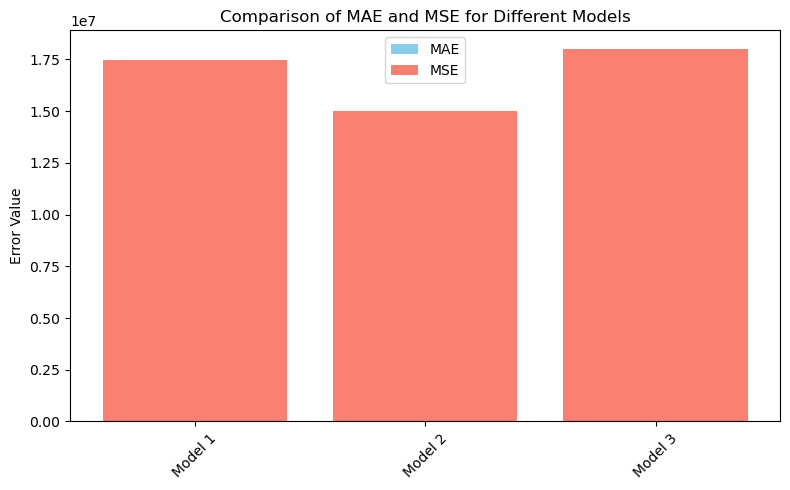

In [19]:
import matplotlib.pyplot as plt

# Sample MAE and MSE values
mae_values = [4181.67, 3000.0, 3500.0]  # Example values, replace with actual values
mse_values = [17486386.74, 15000000.0, 18000000.0]  # Example values, replace with actual values

# Model names
models = ['Model 1', 'Model 2', 'Model 3']  # Example model names, replace with actual model names

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Plot MAE
ax.bar(models, mae_values, color='skyblue', label='MAE')

# Plot MSE
ax.bar(models, mse_values, color='salmon', label='MSE')

# Adding labels and title
ax.set_ylabel('Error Value')
ax.set_title('Comparison of MAE and MSE for Different Models')
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


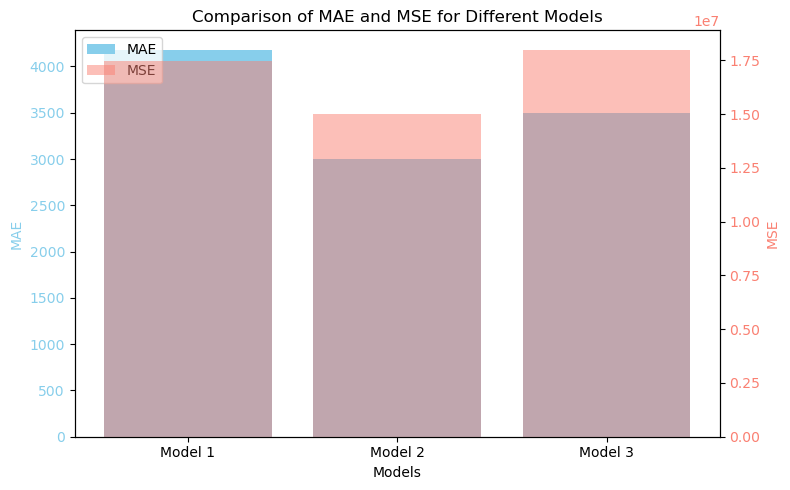

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample MAE and MSE values
mae_values = [4181.67, 3000.0, 3500.0]  # Example values, replace with actual values
mse_values = [17486386.74, 15000000.0, 18000000.0]  # Example values, replace with actual values

# Model names
models = ['Model 1', 'Model 2', 'Model 3']  # Example model names, replace with actual model names

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot MAE on primary y-axis
color = 'skyblue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE', color=color)
ax1.bar(models, mae_values, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for MSE
ax2 = ax1.twinx()  
color = 'salmon'
ax2.set_ylabel('MSE', color=color)  
ax2.bar(models, mse_values, color=color, alpha=0.5, label='MSE')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding title
plt.title('Comparison of MAE and MSE for Different Models')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


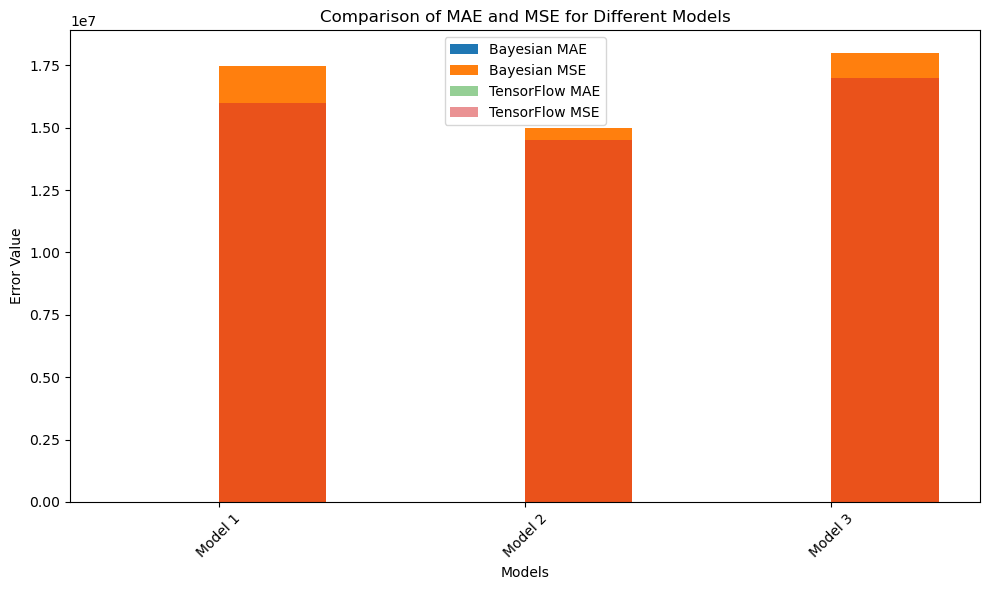

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample MAE and MSE values for Bayesian and TensorFlow models
bayesian_mae_values = [4181.67, 3000.0, 3500.0]  # Example values for Bayesian model
bayesian_mse_values = [17486386.74, 15000000.0, 18000000.0]  # Example values for Bayesian model

tf_mae_values = [3500.0, 2700.0, 3200.0]  # Example values for TensorFlow model
tf_mse_values = [16000000.0, 14500000.0, 17000000.0]  # Example values for TensorFlow model

# Model names
models = ['Model 1', 'Model 2', 'Model 3']  # Example model names, replace with actual model names

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of the bars

# Plot Bayesian MAE and MSE
rects1 = ax.bar(np.arange(len(models)) - width/2, bayesian_mae_values, width, label='Bayesian MAE')
rects2 = ax.bar(np.arange(len(models)) + width/2, bayesian_mse_values, width, label='Bayesian MSE')

# Plot TensorFlow MAE and MSE
rects3 = ax.bar(np.arange(len(models)) - width/2, tf_mae_values, width, label='TensorFlow MAE', alpha=0.5)
rects4 = ax.bar(np.arange(len(models)) + width/2, tf_mse_values, width, label='TensorFlow MSE', alpha=0.5)

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Error Value')
ax.set_title('Comparison of MAE and MSE for Different Models')
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
